**NAME: BHAWANA THAPA**

**UNIVERSITY ID: 2438424**

**GROUP: L5CG4**




 **Introduction to the Covid-19 Dataset**





This dataset provides a comprehensive overview of COVID-19 statistics for 187 countries. It ncludes key metrices such as Confirmed cases, Deaths, Recovered cases and Active cases. Each country is assigned to a specific WHO region, helping in geographical analysis. It allows for the study of mortality rates, recovery trends, and active case progression. It help researchers and policymakers understand the spread and impact of the virus globally.Overall, this dataset is valuable for tracking COVID-19 trends and regional health responses. And it is actually accessed from kaggle, https://www.kaggle.com/datasets/imdevskp/corona-virus-report

**Mount Files and Necessary Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

 **Exploratory Data Analysis and Data Understanding**  

**1. Choosing a Dataset**

**Dataset Name: Country-wise COVID-19 Latest Statistics**

a. When and by whom was the dataset created?

b. How did you access the dataset?

c. How does it align with the chosen UNSDG?
This dataset aligns with UNSDG Goal 3: Good Health and Well-being, which aims to ensure healthy lives and promote well-being for all at all ages.

d. List of attributes (columns) in the dataset:

1.   Country/Region – Name of the country or region
2.   Confirmed – Total confirmed COVID-19 cases
3. Deaths – Total deaths due to COVID-19
4. Recovered – Total recovered cases
5. Active – Active cases currently
6. New cases – New confirmed cases on the latest day
7. New deaths – New reported deaths on the latest day
8. New recovered – New recovered cases on the latest day
9. Deaths / 100 Cases – Death rate per 100 confirmed cases
10. Recovered / 100 Cases – Recovery rate per 100 confirmed cases
11. Deaths / 100 Recovered – Deaths per 100 recovered patients
12. Confirmed last week – Confirmed cases a week ago
13. 1 week change – Change in confirmed cases over the past week
14. 1 week % increase – Percentage increase in cases over the past week
15. WHO Region – WHO region classification of the country

Potential Questions the Dataset Can Help Answer:

*   Can we determine whether a country is above or below the global average in COVID-19 fatality rates?
*   Can we predict whether a country will experience a rise or decline in cases based on past trends?

*   Can we classify countries into high-risk and low-risk based on active cases and death rates?
*   Can we classify countries based on their recovery success rate (High, Medium, Low)?

Accessing the Dataswt's Suitability for Analysis

* Completeness: The dataset contains 187 countries with no missing values, making it well-structured.
* Relevance: It provides key pandemic insights aligned with public health analysis and decision-making
 Quality-The numerical data appers accurate, but source verification is necessary for reliability.










In [3]:
#Read the csv file into the dataframe using Pandas
df = pd.read_csv('/content/drive/MyDrive/Assesment/country_wise_latest.csv')

In [4]:
#Calculate the size of the Dataframe using the 'shape' attribute and store it in the 'data_size' variable

data_size = df.shape
print("Number of rows:", data_size[0])
print("Number of columns:", data_size[1])

Number of rows: 187
Number of columns: 15


In [5]:
#Using info() method to print information of dataset like number of columns, rows, label, column datatypes etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
#Retrive the datatypes of each variable in the Dataframe using the 'dtypes' function
print("The datatypes of each variable is:")
df.dtypes

The datatypes of each variable is:


,0
Country/Region,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
Deaths / 100 Cases,float64
Recovered / 100 Cases,float64


**Data cleaning and Summary Statistics**


In [7]:
#Discover and count the missing values for each variable in column of the DataFrame using the isnull() method
missing_values = df.isnull().sum()
print("Missing values for each variable:\n")
print(missing_values)

Missing values for each variable:

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [8]:
# Drop the specific column
df_cleaned = df.drop(columns=["Deaths / 100 Recovered"])
df_cleaned

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,3326,1226,36.86,Africa


In [9]:
# Rename columns for consistency
df_cleaned.rename(columns={'Country/Region': 'Country',
                  'Deaths / 100 Cases': 'Death Rate (%)',
                  'Recovered / 100 Cases': 'Recovery Rate (%)',
                  '1 week % increase': 'Weekly Increase (%)'}, inplace=True)

# Convert percentage columns to numeric
percentage_cols = ['Death Rate (%)', 'Recovery Rate (%)', 'Weekly Increase (%)']
for col in percentage_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Verify data types
df_cleaned.dtypes

,0
Country,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
Death Rate (%),float64
Recovery Rate (%),float64


In [10]:

#Descriptive Statistics
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,88130.935829,383318.663831,10.00,1114.000,5059.00,40460.500,4290259.00
Deaths,187.0,3497.518717,14100.002482,0.00,18.500,108.00,734.000,148011.00
Recovered,187.0,50631.481283,190188.189643,0.00,626.500,2815.00,22606.000,1846641.00
Active,187.0,34001.935829,213326.173371,0.00,141.500,1600.00,9149.000,2816444.00
New cases,187.0,1222.957219,5710.374790,0.00,4.000,49.00,419.500,56336.00
New deaths,187.0,28.957219,120.037173,0.00,0.000,1.00,6.000,1076.00
New recovered,187.0,933.812834,4197.719635,0.00,0.000,22.00,221.000,33728.00
Death Rate (%),187.0,3.019519,3.454302,0.00,0.945,2.15,3.875,28.56
Recovery Rate (%),187.0,64.820535,26.287694,0.00,48.770,71.32,86.885,100.00
Confirmed last week,187.0,78682.475936,338273.676567,10.00,1051.500,5020.00,37080.500,3834677.00


Visualization of Key Variables

 Top 10 Countries by Confirmed Cases

We identify countries with the highest number of confirmed cases.
Visualizing this data highlights the most affected regions

In [11]:
#Top 10 countries with confirmed cases

top_confirmed = df_cleaned.nlargest(10, 'Confirmed')
display(top_confirmed)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Death Rate (%),Recovery Rate (%),Confirmed last week,1 week change,Weekly Increase (%),WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,276202,17404,6.30,Eastern Mediterranean


<ipython-input-12-f369fd081be2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y = 'Country', data=top_confirmed, palette='Reds_r')


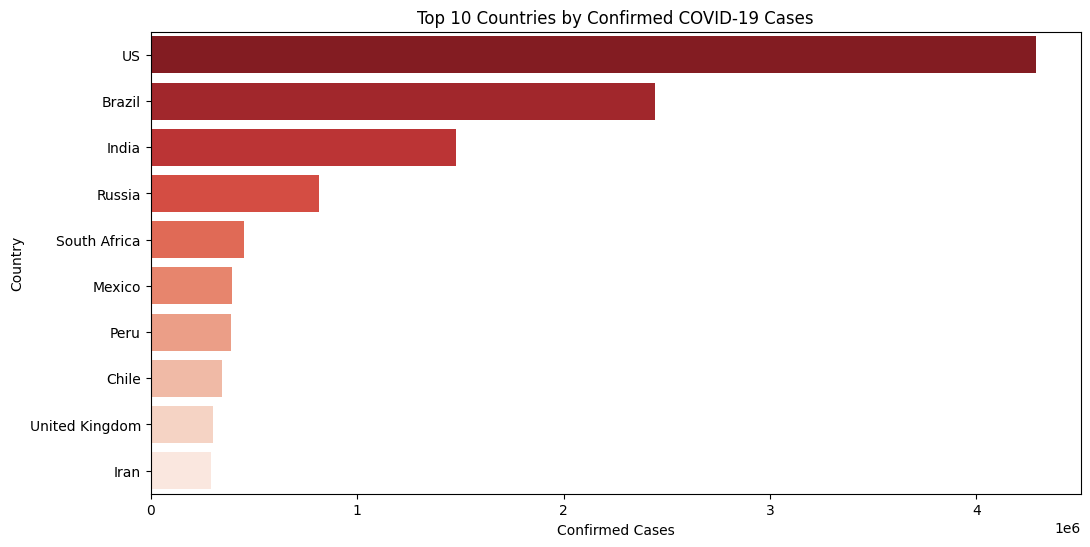

In [12]:
#Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y = 'Country', data=top_confirmed, palette='Reds_r')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

This bar char classifies countries based on the number of confirmed COVID-19 cases. It helps in understanding which countries had the highest reported infections. The top 10 countries are listed in descending order based on their total confirmed cases. By observing this chart, we can see U.S has the highest number of confirmed cases, followed by Brazil and India where Iran has the lowest among the top 10 countries in this dataset. The color intensity represents the severity of cases in each country. The chart doesnot predict trends but instead shows a discrete classification of countries with the most cases.

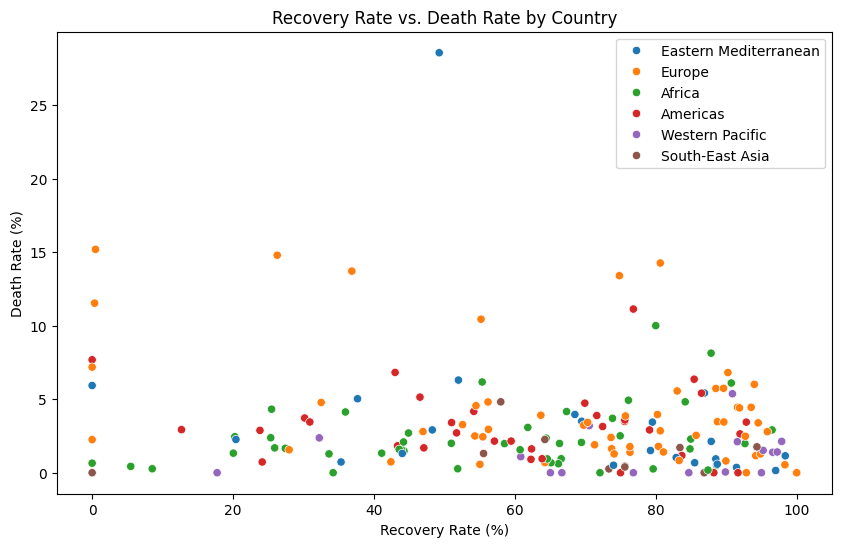

In [13]:
# Scatter plot for mortality vs. recovery rates

plt.figure(figsize=(10,6))
sns.scatterplot(x='Recovery Rate (%)', y = 'Death Rate (%)', data = df_cleaned, hue='WHO Region')
plt.title('Recovery Rate vs. Death Rate by Country')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Death Rate (%)')
plt.legend(loc='upper right')
plt.show()

This scatter plot visualizes the relationship between Recover Rate (%) (X-axis) and Death Rate (%) (Y-axis) for different countries, classified by region. Each point represents a country and colours indicate different geographical regions. Most countries are clustered toward the right and bottom (high recovery, low death), this suggests that in many places the healthcare system was effective in treating COVID-19 cases.While some have higher death rates despite lower recovery rates, which could indicate severe outbreaks or weaker healthcare responses. We can see European (orange dots) and American countries (red dots) seem to be more spread out, indicating variations in COVID-19 outcomes. Also identifies outliers (countries with extremely high death rates).This scatter plot is a classification-based visualization because it groups countries into different regions rather than predicting trends.

In [14]:
# Selecting relevant numerical columns for outlier detection
num_cols = [ 'Confirmed last week', 'Confirmed','Deaths','New cases','Active']


# Compute Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df_cleaned[num_cols].quantile(0.25)
Q3 = df_cleaned[num_cols].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))

# Mark outliers in the dataset
df["Outlier_IQR"] = outliers.any(axis=1)

# Count the number of detected outliers
outlier_count = df["Outlier_IQR"].sum()
print(f"Total number of outliers detected: {outlier_count}")






Total number of outliers detected: 42


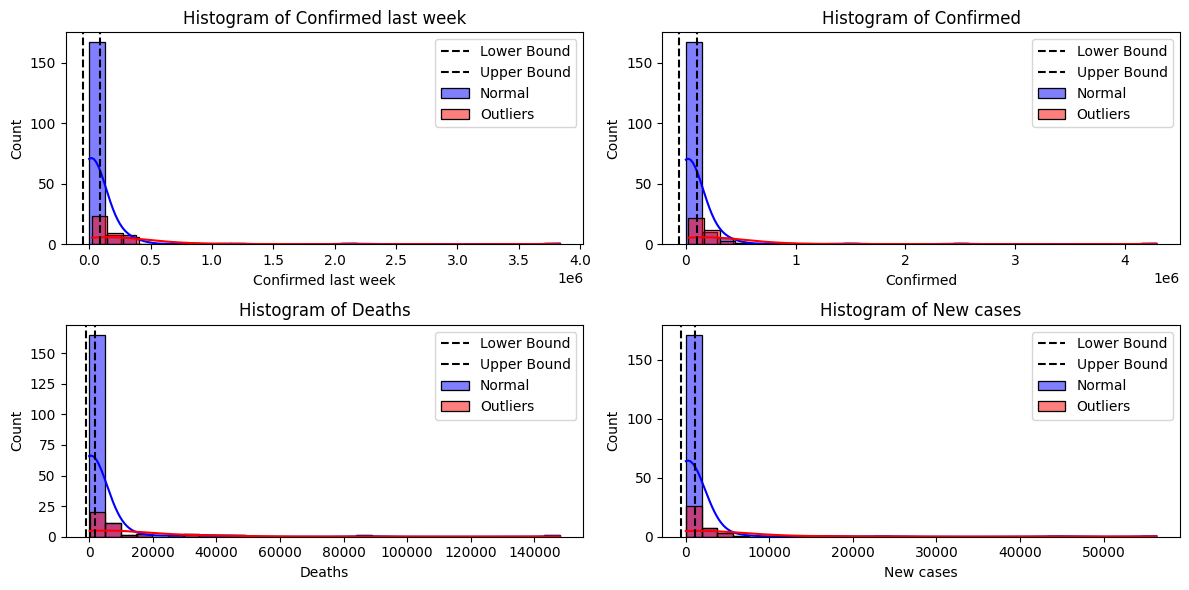

In [15]:
# Plot histograms of numerical features with outliers highlighted
plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols[:4]):  # Plot first 4 columns for better visualization
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue', label="Normal")
    sns.histplot(df[df["Outlier_IQR"]][col], bins=30, kde=True, color='red', label="Outliers")
    plt.axvline(lower_bound[col], color='black', linestyle='dashed', label="Lower Bound")
    plt.axvline(upper_bound[col], color='black', linestyle='dashed', label="Upper Bound")
    plt.legend()
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()



*   Histogram of confirmed last week:
X-axis represents the number of confirmed COVID-19 cases last week and Y-axis shows the frequency of occurences for each bin. The data is right-skewed, meaning the most regions had a relatively low number of confirmed cases, while a few regions had extremely high numbers(outliers in red). The black lines shows the calculated lower and upper bounds for identifying outliers.

Similarly all the pattern of histogram is same as before, distribution is heavily right-skewed indicating that most of the data points are concentrated at lower values, while a few extreme outliers exists. The red bars indicates outliers, which are significantly higher than the normal range. And the blue curve represents the probability density funtion, showing how the data is distributed.




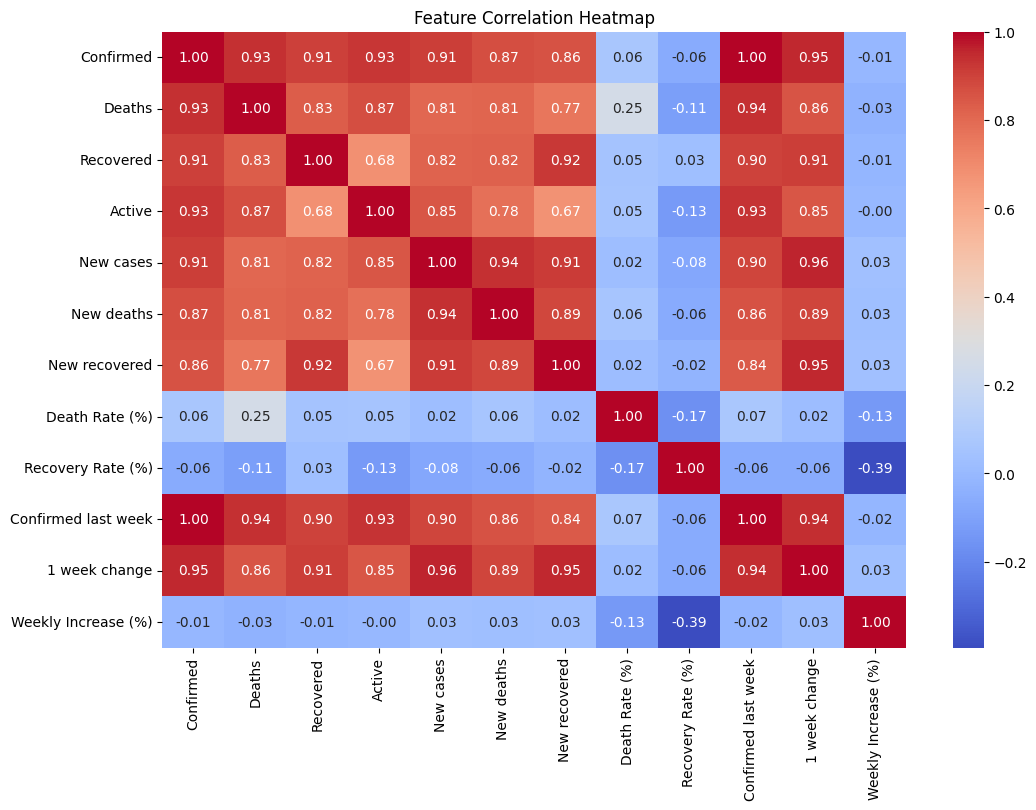

In [17]:

df_numeric = df_cleaned.select_dtypes(include=[np.number])

# Compute variance and drop low variance columns (threshold = 0.01)
variance = df_numeric.var()
low_variance_cols = variance[variance < 0.01].index
df_numeric.drop(columns=low_variance_cols, inplace=True)


# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


This figure is a correlation heatmap showing the relationship between differenct COVID-19 related features. The values in the heatmap represent the Pearson correlation coefficient(r), which measures the strength and direction of a linear relationship between two variables.
Range of Correlation Coefficients(r):


*   r = 1.00, Perfect positive correaltion (as one variable increases, the other decreaes).
*   r = -1.00, Perfect negative correlation (as one variable increases, the other decreases).
*  r = 0.00, No correlation.

For example, The number of confirmed cases is highly correlated with the number of deaths(0.93). This make sense because higher infection typically lead more fatalities. As we see, there is a weak negative correlation between 'Recovery Rate' and 'Death Rate' meaning that as recovery rates increases, the death rate slightly decreases, which is expected.
Strong clusters of correalted features are confirmed cases, deaths,recoveries, and active cases. For building a predictive model we can use highly correlated features.




In [18]:
# Define binary classification target: High vs Low Fatality Rate
threshold = 5  # 5% fatality rate
df_cleaned['Fatality_Risk'] = np.where(df['Deaths / 100 Cases'] > threshold, 'High', 'Low')

# Define multiclass classification target: WHO Region
if 'WHO Region' in df.columns:
    df_cleaned['WHO Region'] = df_cleaned['WHO Region'].astype('category').cat.codes  # Convert to numerical labels

# Drop unnecessary columns
drop_cols = ['Country', 'Death Rate (%)']
df_cleaned = df_cleaned.drop(columns=[col for col in drop_cols if col in df_cleaned.columns])

df_cleaned

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Recovery Rate (%),Confirmed last week,1 week change,Weekly Increase (%),WHO Region,Fatality_Risk
0,36263,1269,25198,9796,106,10,18,69.49,35526,737,2.07,2,Low
1,4880,144,2745,1991,117,6,63,56.25,4171,709,17.00,3,Low
2,27973,1163,18837,7973,616,8,749,67.34,23691,4282,18.07,0,Low
3,907,52,803,52,10,0,0,88.53,884,23,2.60,3,High
4,950,41,242,667,18,1,0,25.47,749,201,26.84,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,10621,78,3752,6791,152,2,0,35.33,8916,1705,19.12,2,Low
183,10,1,8,1,0,0,0,80.00,10,0,0.00,0,High
184,1691,483,833,375,10,4,36,49.26,1619,72,4.45,2,High
185,4552,140,2815,1597,71,1,465,61.84,3326,1226,36.86,0,Low


<ipython-input-20-bbcdd4d79e70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['Fatality_Risk'], ax=axes[0], palette='coolwarm')
<ipython-input-20-bbcdd4d79e70>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['WHO Region'], ax=axes[1], palette='viridis')


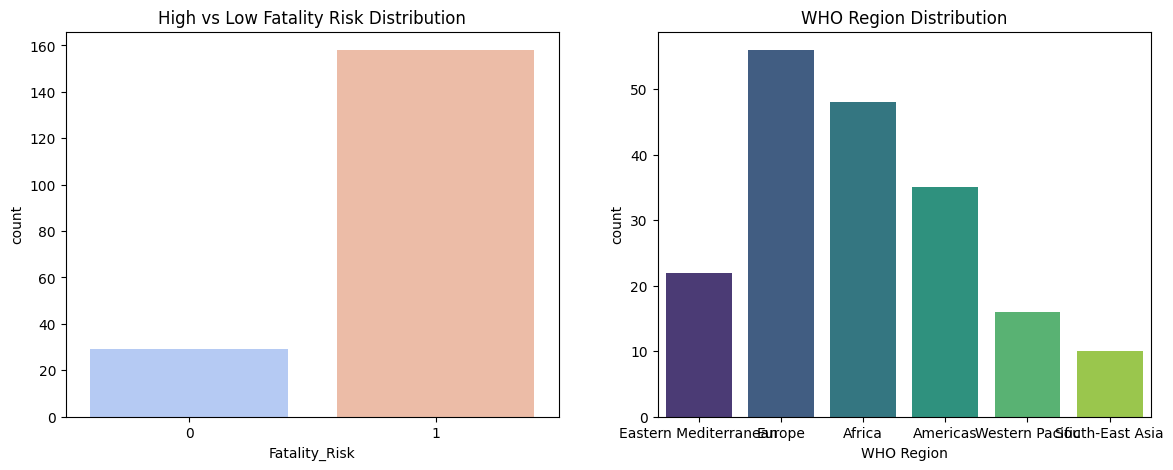

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Plot target distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Encode binary classification target
target_encoder = LabelEncoder()
df_cleaned['Fatality_Risk'] = target_encoder.fit_transform(df_cleaned['Fatality_Risk'])


# Binary classification distribution
sns.countplot(x=df_cleaned['Fatality_Risk'], ax=axes[0], palette='coolwarm')
axes[0].set_title("High vs Low Fatality Risk Distribution")


# Multiclass classification distribution
sns.countplot(x=df['WHO Region'], ax=axes[1], palette='viridis')
axes[1].set_title("WHO Region Distribution")

plt.show()



High vs Low Fatality Risk:
This is a binary classification distribution that shows the number of cases classified as low fatility risk '0'(cases where the risk of death is lower) vs. high fatality risk '1'(cases where the risk of death is higher). While y-axis represents the count(frequency), the height of each bar represents the number of instances in the dataset for each class.
The first bar is shorter meaning fewer cases fall into the lower fatility risk category. On the other hand, bar '1' indicate that most cases belong to high fatality risk.

WHO Region Distribution:
This plot visualizes the distribution of cases across different WHO regions, which is a multiclass categorical variable. The height of each bar represents the number of cases recorded in each WHO region. Each category on the x-axis represents a different World Health Organization (WHO) region.
By observation we can tell that Europe has the highest number of cases, followed by Africa and the Americas. While, other regions have relatively fewer cases. Understanding regional variations helps in public health decision-making and resource allocation.



# **Model from scratch**


In [21]:

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Applies the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Trains the model using gradient descent."""
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)  # Initialize weights
        self.bias = 0  # Initialize bias

        # Gradient descent loop
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Predicts labels for new data."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# Load dataset (assuming df_cleaned is already preprocessed)
X = df_cleaned[['New cases', 'New deaths', 'New recovered', 'Confirmed']].values
y = df_cleaned['Fatality_Risk'].values

# Handle missing values (if any)
X = np.nan_to_num(X)  # Replace NaN with 0
y = np.nan_to_num(y)

def train_test_split_manual(X, y, test_size=0.2, random_seed=42):
    """Manually splits dataset into training and testing sets with a fixed seed."""
    np.random.seed(random_seed)  # Set random seed for reproducibility
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle indices with fixed randomness

    split_idx = int(len(indices) * (1 - test_size))  # Train size
    train_indices, test_indices = indices[:split_idx], indices[split_idx:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Split dataset (with a fixed seed)
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_seed=42)


# Train model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8947


<ipython-input-21-248ce9179a40>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


# **Build a Primary Model**

In [22]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:

# Select features and targets for both classification tasks
X = df_cleaned.drop(columns=['Fatality_Risk'])  # Features
y= df_cleaned['Fatality_Risk']  # Binary target
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split dataset into training and testing sets for binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy of Decision Tree: {accuracy_tree:.4f}')


Accuracy of Decision Tree: 0.7895


The decision tree model has an accuracy of 78.95% on the test data, meaning it correctly predicted the class labels for about 79% of the test cases. This suggests that the model has learned a reasonable pattern from the training data, but there is still room for improvement depending on the complexity of the data.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)  # Initialize with random_state
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')

Accuracy of Random Forest: 0.8684


Random Forest outperforms Decision Tree due to its ensemble approach, achieving 86.84% accuracy. It reduces overfitting and improves generalization, making it a more robust and accurate classifier.

# **Hyper-parameter with cross validation**

In [26]:


# Identifying hyperparameters for RandomForestClassifier
rf_hyperparameters = random_forest_model.get_params()
print("RandomForestClassifier Hyperparameters:")
for param, value in rf_hyperparameters.items():
    print(f"{param}: {value}")

RandomForestClassifier Hyperparameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [27]:
# Identifying hyperparameters for DecisionTreeClassifier
dt_hyperparameters = decision_tree_model.get_params()
print("DecisionTreeClassifier Hyperparameters:")
for param, value in dt_hyperparameters.items():
    print(f"{param}: {value}")


DecisionTreeClassifier Hyperparameters:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

param_grid = {
   'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
print("Best Parameters:", dt_grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 10]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print("Best Parameters:", rf_grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}


# **Feature Selection:**

In [30]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree with best parameters
dt_best = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=42)
dt_best.fit(X_train, y_train)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(dt_best, n_features_to_select=10)  # Change number of features as needed
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get selected feature names
selected_features_rfe = df_cleaned.drop(columns=['Fatality_Risk']).columns[rfe.support_]
print("Selected Features (RFE):", selected_features_rfe)

Selected Features (RFE): Index(['Confirmed', 'Deaths', 'Active', 'New cases', 'New recovered',
       'Recovery Rate (%)', 'Confirmed last week', '1 week change',
       'Weekly Increase (%)', 'WHO Region'],
      dtype='object')


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Train Random Forest on the best parameters
rf_best = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

# Select important features based on feature importance
selector = SelectFromModel(rf_best, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features =df_cleaned.drop(columns=['Fatality_Risk']).columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'Recovery Rate (%)',
       'Confirmed last week', 'Weekly Increase (%)'],
      dtype='object')


In [32]:
rf_best.fit(X_train_selected, y_train)
dt_best.fit(X_train_rfe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)

# **Final Model**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest on selected features
rf_final = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
rf_final.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_rf = rf_final.predict(X_test_selected)

# Accuracy Calculation in Percentage
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Evaluate performance
print("Final Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Final Random Forest Model Performance:
Accuracy: 0.8947
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        31

    accuracy                           0.89        38
   macro avg       0.85      0.77      0.80        38
weighted avg       0.89      0.89      0.89        38



In [34]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree on selected features
dt_final = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=42)
dt_final.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_dt = dt_final.predict(X_test_rfe)

# Accuracy Calculation in Percentage
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Evaluate performance
print("\nFinal Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



Final Decision Tree Model Performance:
Accuracy: 0.8421
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        31

    accuracy                           0.84        38
   macro avg       0.74      0.68      0.70        38
weighted avg       0.83      0.84      0.83        38

